In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 I think location, dwelling's marks and area are main features to work with.

In [4]:
df1 = df[['Neighborhood', 'OverallQual', 'OverallCond', 'LotArea', 'SalePrice', ]]

test1 = test[['Neighborhood', 'OverallQual', 'OverallCond', 'LotArea']]
df1

,Neighborhood,OverallQual,OverallCond,LotArea,SalePrice
0,CollgCr,7,5,8450,208500
1,Veenker,6,8,9600,181500
2,CollgCr,7,5,11250,223500
3,Crawfor,7,5,9550,140000
4,NoRidge,8,5,14260,250000
...,...,...,...,...,...
1455,Gilbert,6,5,7917,175000
1456,NWAmes,6,6,13175,210000
1457,Crawfor,7,9,9042,266500
1458,NAmes,5,6,9717,142125


In [5]:
df2 = df1.copy()
df2['pps'] = df2['SalePrice']/df2['LotArea']
df2.head()

,Neighborhood,OverallQual,OverallCond,LotArea,SalePrice,pps
0,CollgCr,7,5,8450,208500,24.674556
1,Veenker,6,8,9600,181500,18.906250
2,CollgCr,7,5,11250,223500,19.866667
3,Crawfor,7,5,9550,140000,14.659686
4,NoRidge,8,5,14260,250000,17.531557


Text(0, 0.5, 'Count')

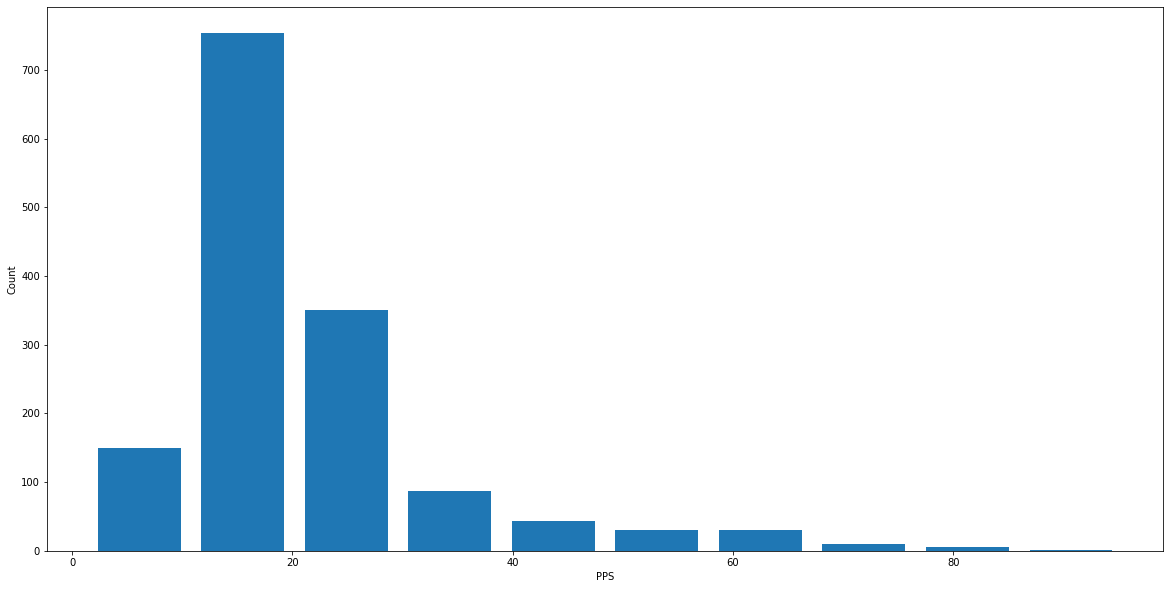

In [77]:
df2['pps'].describe()
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.pps,rwidth=0.8)
plt.xlabel("PPS")
plt.ylabel("Count")

Now we're going to remove outliers using Standart Deviation and Mean

In [7]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Neighborhood'):
        m = np.mean(subdf.pps)
        st = np.std(subdf.pps)
        reduced_df = subdf[(subdf.pps>(m-st)) & (subdf.pps<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(1095, 6)

Text(0, 0.5, 'Count')

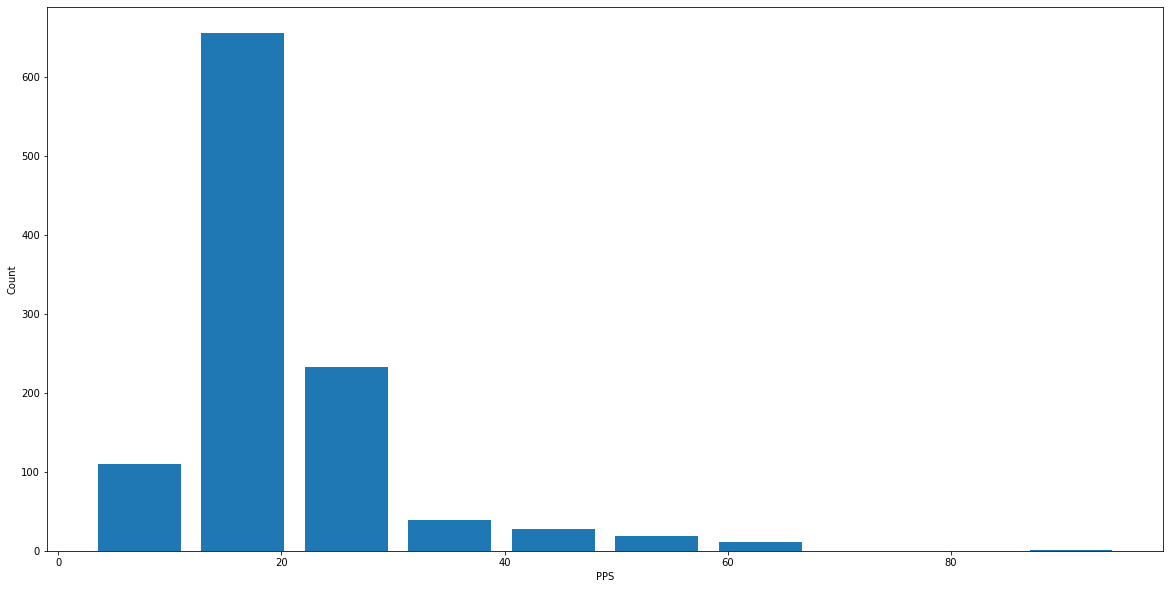

In [78]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.pps,rwidth=0.8)
plt.xlabel("PPS")
plt.ylabel("Count")

Now we need to encode the location

In [79]:
dummies = pd.get_dummies(df3.Neighborhood)
dummies.head(5)

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df4 = pd.concat([df3.drop(['Neighborhood','pps'],axis='columns'),dummies],axis='columns')
df4.head(5)

,OverallQual,OverallCond,LotArea,SalePrice,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,7,5,3010,167240,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,5,3182,192500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,5,3182,192000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,5,3072,178740,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,5,3922,194201,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df4.drop(['SalePrice'],axis='columns')
X.head(3)

,OverallQual,OverallCond,LotArea,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,7,5,3010,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,5,3182,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,5,3182,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = df4.SalePrice
y.head(3)

0    167240
1    192500
2    192000
Name: SalePrice, dtype: int64

I'm going to use simple linear regression

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [13]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7995391198311108

In [14]:
def predict_price(location,oq,oc,la):    
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = oq
    x[1] = oc
    x[2] = la
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [73]:
def final_predict(df):
    fin = pd.Series([0])
    for i in range(len(df)):
        fin[i] = predict_price(df['Neighborhood'][i], df['OverallQual'][i], df['OverallCond'][i], df['LotArea'][i])
    return fin

In [74]:
final = final_predict(test1)
final

0       141592.000000
1       178045.412005
2       158110.346083
3       176207.599900
4       286981.389995
            ...      
1454     88504.422806
1455     82926.420710
1456    178004.172933
1457    141552.060288
1458    194656.674926
Length: 1459, dtype: float64

In [75]:
final.to_csv('prediction.csv', index=False, header=None)